In [41]:
from CGS import solve_cgs;
from CGN import solve_cgn;
from scipy.sparse.linalg import qmr;
import matrixgenerators
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# To be ran 
import importlib
import CGS
import CGN
import matrixgenerators

importlib.reload(CGS)
importlib.reload(CGN)
importlib.reload(matrixgenerators)

from CGS import solve_cgs
from CGN import solve_cgn


[array([-0.39229065,  0.03140492,  0.01935474,  0.32603104,  0.95725161,
       -0.10208799, -0.43540184, -0.07447244]), [1.7479937179621878, 2129.4887666213085, 261.1548416973581, 9.104671473608853, 1.7394788405406199, 16.482201482174222, 0.4555804929806067, 0.7334639723655259, 6.479966930678729e-12], True]


First experiment: Calculating how residual error + time taken to run change with matrix size with a fixed condition number.

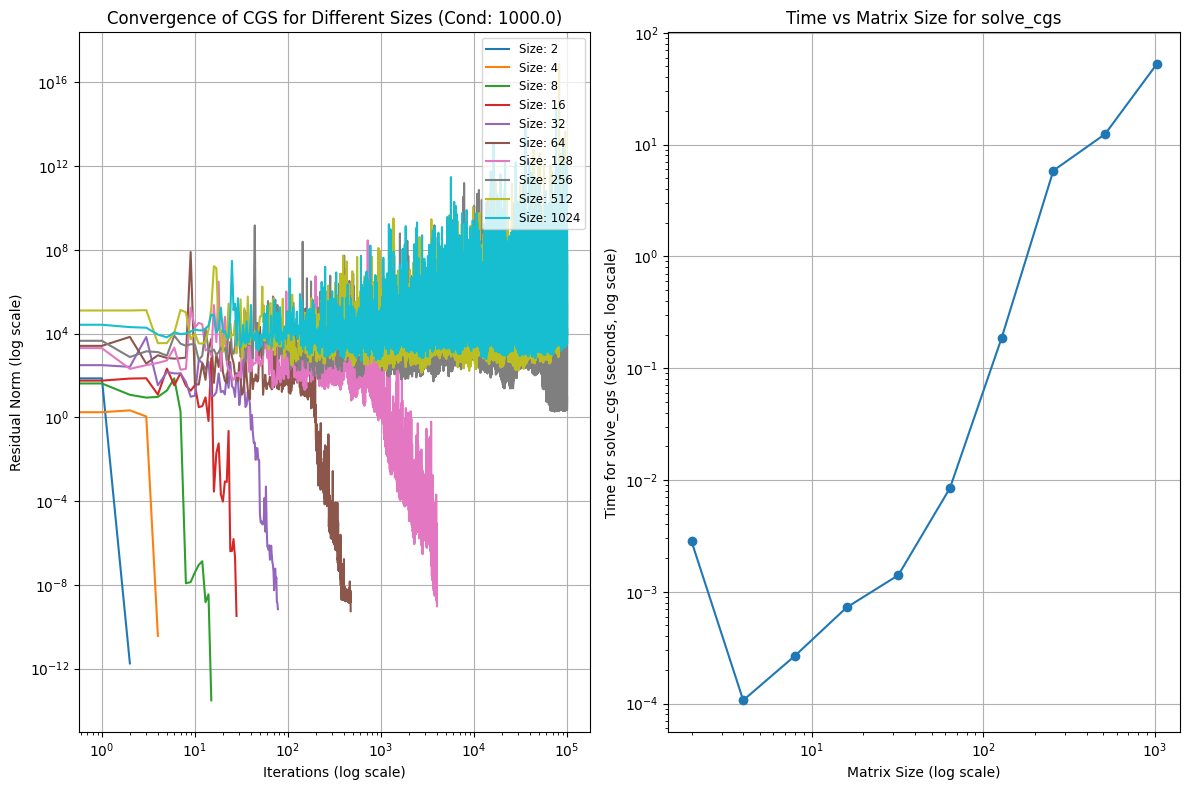

In [62]:
import time
import matplotlib.pyplot as plt

# Fixed condition number
fixed_kappa = 1e3  # Example condition number
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Matrix sizes

# Store residuals and timing results
results_size = {}
timings_size = {}

for dim in sizes:
    b = np.random.rand(dim)  # Random right-hand side vector
    A = matrixgenerators.cond_num_matrix(dim, fixed_kappa)
    
    start_time = time.time()
    _, residuals, _ = solve_cgs(A, b)  # Use solve_cgs to get residuals
    end_time = time.time()
    
    results_size[dim] = residuals
    timings_size[dim] = end_time - start_time  # Total time for the solve_cgs call

# Plot residuals for CGS
plt.figure(figsize=(12, 8))

# Subplot 1: Residuals vs iterations
plt.subplot(1, 2, 1)
for dim, residuals in results_size.items():
    plt.plot(residuals, label=f"Size: {dim}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGS for Different Sizes (Cond: {fixed_kappa})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# Subplot 2: Timing vs matrix size
plt.subplot(1, 2, 2)
plt.plot(timings_size.keys(), timings_size.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time for solve_cgs (seconds, log scale)")
plt.title("Time vs Matrix Size for solve_cgs")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt

# Fixed matrix size
fixed_size = 128  # Example matrix size
condition_numbers = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]  # Condition numbers to test

# Store residuals and timing results
results_condition = {}
timings_condition = {}

for kappa in condition_numbers:
    b = np.random.rand(fixed_size)  # Random right-hand side vector
    A = (matrixgenerators.cond_num_matrix(fixed_size, kappa)) * 10
    
    start_time = time.time()
    _, residuals, _ = solve_cgs(A, b)  # Use solve_cgs to get residuals
    end_time = time.time()
    
    results_condition[kappa] = residuals
    timings_condition[kappa] = end_time - start_time  # Total time for the solve_cgs call

# Plot results for CGS
plt.figure(figsize=(12, 8))

# Subplot 1: Residuals vs iterations
plt.subplot(1, 2, 1)
for kappa, residuals in results_condition.items():
    plt.plot(residuals, label=f"Cond: {kappa:.0e}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGS for Different Condition Numbers (Size: {fixed_size})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# Subplot 2: Timing vs condition number
plt.subplot(1, 2, 2)
plt.plot(timings_condition.keys(), timings_condition.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Condition Number (log scale)")
plt.ylabel("Time for solve_cgs (seconds, log scale)")
plt.title("Time vs Condition Number for solve_cgs")
plt.grid()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 